In [ ]:
#This Notebook shows the Implementation of Inception_V1

In [10]:
import keras
from keras.models import Model
from keras.layers import Dropout,Dense,Input,concatenate,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D,AveragePooling2D
from keras.initializers import glorot_uniform
import pydot
from IPython.display import SVG
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot

In [9]:
#repeating unit of  inception model 

def Inception(X,
              filters_1x1,
              filters_3x3_reduce,
              filters_3x3,
              filters_5x5_reduce,
              filters_5x5,
              filters_pool_proj,
              name=None): 
    
    conv1x1_L1a = Conv2D(filters_3x3_reduce,kernel_size=(1,1),strides=(1,1),padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu')(X)
    conv1x1_L1b = Conv2D(filters_5x5_reduce,kernel_size=(1,1),strides=(1,1),padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu')(X)
    pool_L1 =MaxPooling2D(pool_size=(3,3),strides=(1,1),padding='same')(X)
    
    
    conv1x1_L2a = Conv2D(filters_1x1,kernel_size=(1,1),strides=(1,1),padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu')(X)
    conv3x3_L2   = Conv2D(filters_3x3,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu')(conv1x1_L1a)
    conv5x5_L2   = Conv2D(filters_5x5,kernel_size=(5,5),strides=(1,1),padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu')(conv1x1_L1b)
    conv1x1_L2b = Conv2D(filters_pool_proj,kernel_size=(1,1),strides=(1,1),padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu')(pool_L1)
    
    output = concatenate([conv1x1_L2a,conv3x3_L2,conv5x5_L2,conv1x1_L2b],name=name,axis=3)
    
    return output    

In [3]:
def model(input_shape):
    input_layer=Input(shape=input_shape)
    
    X =Conv2D(filters=64,kernel_size=(7,7),strides=(2,2),padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu')(input_layer)
    X =MaxPooling2D(pool_size =(3,3),strides=(2,2),padding='same')(X)
    
    X =Conv2D(filters=64,kernel_size=(1,1),strides=(1,1),padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu')(X)
    X =Conv2D(filters=192,kernel_size=(3,3),strides=(1,1),padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu')(X)
    X =MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(X)
    
    X =Inception(X,
                 filters_1x1=64,
                 filters_3x3_reduce=96,
                 filters_3x3=128,
                 filters_5x5_reduce=16,
                 filters_5x5=32,
                 filters_pool_proj=32,
                 name='inception_3a')
    
    X =Inception(X,
                 filters_1x1=128,
                 filters_3x3_reduce=128,
                 filters_3x3=192,
                 filters_5x5_reduce=32,
                 filters_5x5=96,
                 filters_pool_proj=64,
                 name='inception_3b')
    
    X =MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(X)
    
    X =Inception(X,
                 filters_1x1=192,
                 filters_3x3_reduce=96,
                 filters_3x3=208,
                 filters_5x5_reduce=16,
                 filters_5x5=48,
                 filters_pool_proj=64,
                 name='inception_4a')
    
    output1 =AveragePooling2D(pool_size=(5,5),strides=(3,3))(X)
    output1 =Conv2D(128,kernel_size=(1,1),strides=(1,1),padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu')(output1)
    output1 =Flatten()(output1)
    output1 =Dense(1024,activation='relu',name='FC1')(output1)
    output1 =Dropout(0.7)(output1)
    softmax1 =Dense(1000,activation='softmax',name='Auxilliary_softmax1')(output1)
    
    X =Inception(X,
                 filters_1x1=160,
                 filters_3x3_reduce=112,
                 filters_3x3=224,
                 filters_5x5_reduce=24,
                 filters_5x5=64,
                 filters_pool_proj=64,
                 name='inception_4b')
    
    X =Inception(X,
                 filters_1x1=128,
                 filters_3x3_reduce=128,
                 filters_3x3=256,
                 filters_5x5_reduce=24,
                 filters_5x5=64,
                 filters_pool_proj=64,
                 name='inception_4c')  
    
    X =Inception(X,
                 filters_1x1=112,
                 filters_3x3_reduce=144,
                 filters_3x3=288,
                 filters_5x5_reduce=32,
                 filters_5x5=64,
                 filters_pool_proj=64,
                 name='inception_4d') 
    
    output2 =AveragePooling2D(pool_size=(5,5),strides=(3,3))(X)
    output2 =Conv2D(128,kernel_size=(1,1),strides=(1,1),padding='same',kernel_initializer=glorot_uniform(seed=0),activation='relu')(output2)
    output2 =Flatten()(output2)
    output2 =Dense(1024,activation='relu',name='FC2')(output2)
    output2 =Dropout(0.7)(output2)
    softmax2 =Dense(1000,activation='softmax',name='Auxilliary_softmax2')(output2)
    
    
    
    X =Inception(X,
                 filters_1x1=256,
                 filters_3x3_reduce=160,
                 filters_3x3=320,
                 filters_5x5_reduce=32,
                 filters_5x5=128,
                 filters_pool_proj=128,
                 name='inception_4e')
    
    X =MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(X)
    
    X =Inception(X,
                 filters_1x1=256,
                 filters_3x3_reduce=160,
                 filters_3x3=320,
                 filters_5x5_reduce=32,
                 filters_5x5=128,
                 filters_pool_proj=128,
                 name='inception_5a')
    
    X =Inception(X,
                 filters_1x1=384,
                 filters_3x3_reduce=192,
                 filters_3x3=384,
                 filters_5x5_reduce=48,
                 filters_5x5=128,
                 filters_pool_proj=128,
                 name='inception_5b')
    
    X = AveragePooling2D(pool_size=(7,7),strides=(1,1))(X)
    X =Dropout(0.4)(X)
    X =Dense(1000,name='FC3')(X)
    softmax3=Activation('softmax',name='softmax3')(X)
    
    model =Model(input_layer,[softmax3,softmax1,softmax2],name='Inception_V1')
    return model

In [4]:
model=model((224,224,3))

In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 56, 56, 64)   4160        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
conv2d_3 (

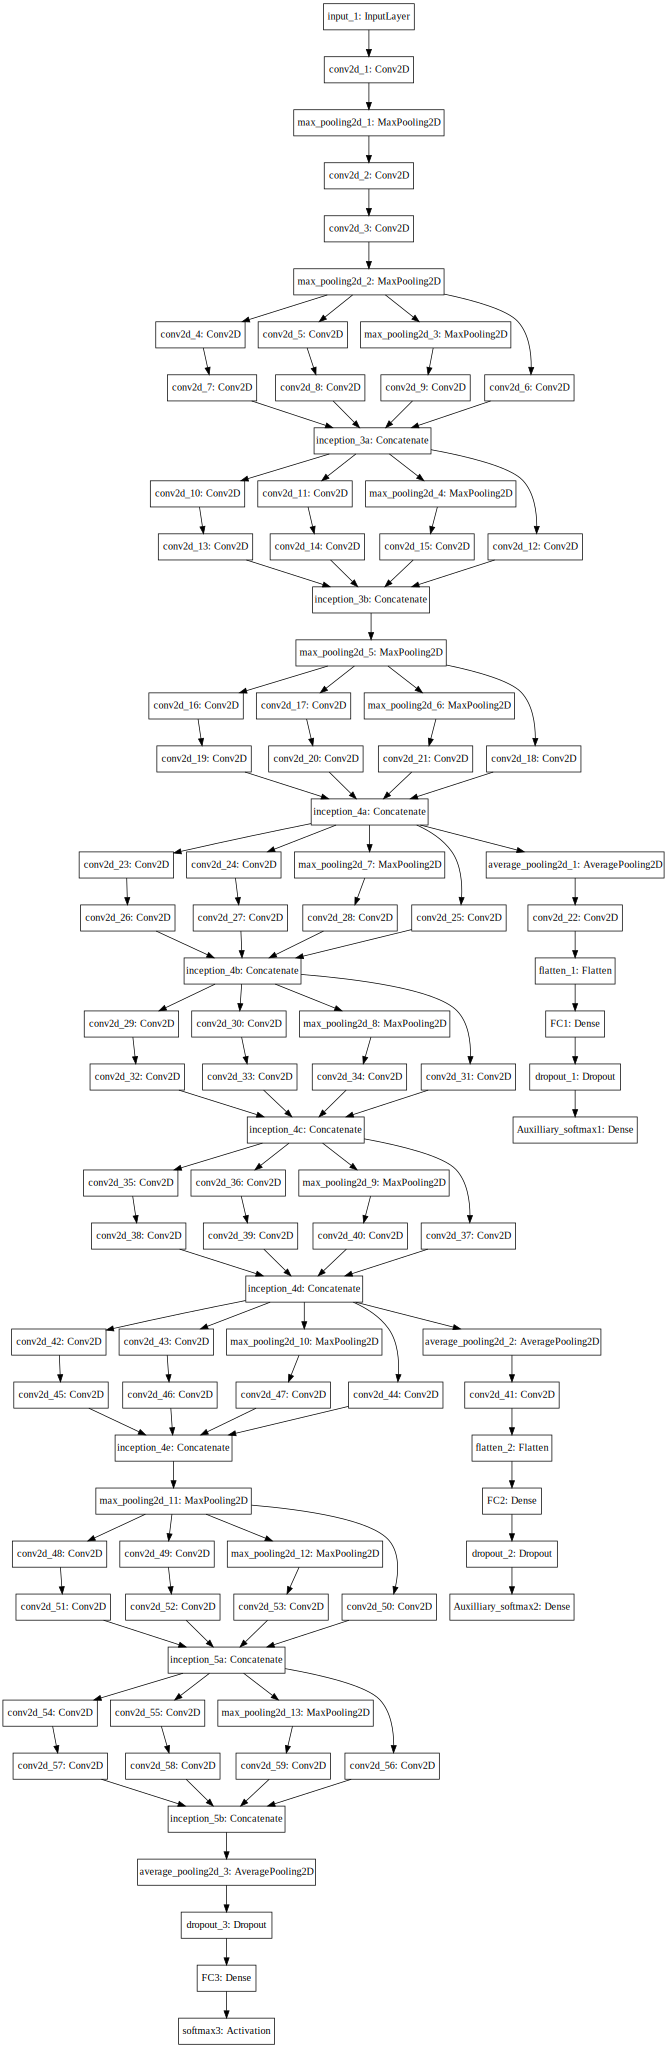

In [12]:
plot_model(model, to_file='InceptionV1.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))